# Data processing and initial analysis
In this notebook, we will process and analyse the data inside the Dutch House Prices Dataset. We demonstrates how to preprocess the text data and show a quick analysis. The dataset consists of more than 5500 houses listed for sale in the Netherlands.

This notebook is part of my House Price series in which we create a dataset, train a prediction model, and deploy the model and an accompanying web app.

© Bryan Lusse - 2022

## Preprocessing of the data


### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import itertools
import math

In [2]:
# Definition of all dutch cities
all_cities = ["'s Gravenmoer", "'s-Graveland", "'s-Gravendeel", "'s-Gravenhage", "'s-Gravenpolder", "'s-Gravenzande", "'s-Heer Abtskerke", "'s-Heer Arendskerke", "'s-Heer Hendrikskinderen", "'s-Heerenberg", "'s-Heerenbroek", "'s-Heerenhoek", "'s-Hertogenbosch", "'t Goy", "'t Haantje", "'t Harde", "'t Loo Oldebroek", "'t Veld", "'t Waar", "'t Zand", "'t Zandt", "1e Exlo+½rmond", "2e Exlo+½rmond", "2e Valthermond", "Aadorp", "Aagtekerke", "Aalden", "Aalsmeer", "Aalsmeerderbrug", "Aalst", "Aalsum", "Aalten", "Aardenburg", "Aarlanderveen", "Aarle-Rixtel", "Aartswoud", "Abbega", "Abbekerk", "Abbenbroek", "Abbenes", "Abcoude", "Achlum", "Achterveld", "Achthuizen", "Achtmaal", "Acquoy", "Adorp", "Aduard", "Aerdenhout", "Aerdt", "Afferden", "Afferden L", "Agelo", "Akersloot", "Akkrum", "Akmarijp", "Albergen", "Alblasserdam", "Alde Leie", "Aldeboarn", "Aldtsjerk", "Alem", "Alkmaar", "Allingawier", "Almelo", "Almen", "Almere", "Almkerk", "Alphen", "Alphen aan den Rijn", "Alteveer", "Alteveer gem Hoogeveen", "Altforst", "Ambt Delden", "Ameide", "Amen", "America", "Amerongen", "Amersfoort", "Ammerstol", "Ammerzoden", "Amstelhoek", "Amstelveen", "Amstenrade", "Amsterdam", "Amsterdam Zuidoost", "Amsterdam-Duivendrecht", "Andel", "Andelst", "Anderen", "Andijk", "Ane", "Anerveen", "Anevelde", "Angeren", "Angerlo", "Anjum", "Ankeveen", "Anloo", "Anna Paulowna", "Annen", "Annerveenschekanaal", "Ansen", "Apeldoorn", "Appelscha", "Appeltern", "Appingedam", "Arcen", "Arkel", "Arnemuiden", "Arnhem", "Arri+½n", "Arum", "Asch", "Asperen", "Assen", "Assendelft", "Asten", "Augsbuurt", "Augustinusga", "Austerlitz", "Avenhorn", "Axel", "Azewijn", "Baaiduinen", "Baaium", "Baak", "Baambrugge", "Baard", "Baarland", "Baarle-Nassau", "Baarlo", "Baarn", "Baars", "Babberich", "Babyloni+½nbroek", "Bad Nieuweschans", "Badhoevedorp", "Baexem", "Baflo", "Bakel", "Bakhuizen", "Bakkeveen", "Balgoij", "Balinge", "Balk", "Balkbrug", "Ballo+½rveld", "Balloo", "Ballum", "Baneheide", "Banholt", "Bant", "Bantega", "Barchem", "Barendrecht", "Barger-Compascuum", "Barneveld", "Barsingerhorn", "Basse", "Batenburg", "Bathmen", "Bavel", "Bavel AC", "Bears", "Bedum", "Beegden", "Beek", "Beek en Donk", "Beekbergen", "Beemte Broekland", "Beers NB", "Beerta", "Beerze", "Beerzerveld", "Beesd", "Beesel", "Beets", "Beetsterzwaag", "Beilen", "Beinsdorp", "Belfeld", "Bellingwolde", "Belt-Schutsloot", "Beltrum", "Bemelen", "Bemmel", "Beneden-Leeuwen", "Bennebroek", "Bennekom", "Benneveld", "Benningbroek", "Benschop", "Bentelo", "Benthuizen", "Bentveld", "Berg en Dal", "Berg en Terblijt", "Bergambacht", "Bergeijk", "Bergen (NH)", "Bergen L", "Bergen aan Zee", "Bergen op Zoom", "Bergentheim", "Bergharen", "Berghem", "Bergschenhoek", "Beringe", "Berkel en Rodenrijs", "Berkel-Enschot", "Berkenwoude", "Berkhout", "Berlicum", "Berltsum", "Bern", "Best", "Beugen", "Beuningen", "Beuningen Gld", "Beusichem", "Beutenaken", "Beverwijk", "Biddinghuizen", "Bierum", "Biervliet", "Biest-Houtakker", "Biezenmortel", "Biggekerke", "Bilthoven", "Bingelrade", "Bitgum", "Bitgummole", "Bladel", "Blankenham", "Blaricum", "Blauwestad", "Blauwhuis", "Bleiswijk", "Blesdijke", "Bleskensgraaf ca", "Blessum", "Blije", "Blijham", "Blitterswijck", "Bloemendaal", "Blokker", "Blokzijl", "Boazum", "Bocholtz", "Bodegraven", "Boekel", "Boelenslaan", "Boer", "Boerakker", "Boesingheliede", "Boijl", "Boksum", "Bolsward", "Bontebok", "Boornbergum", "Boornzwaag", "Borculo", "Borger", "Borgercompagnie", "Borgsweer", "Born", "Borne", "Bornerbroek", "Bornwird", "Borssele", "Bosch en Duin", "Boschoord", "Boskoop", "Bosschenhoofd", "Botlek Rotterdam", "Bourtange", "Boven-Leeuwen", "Bovenkarspel", "Bovensmilde", "Boxmeer", "Boxtel", "Braamt", "Brakel", "Brandwijk", "Brantgum", "Breda", "Bredevoort", "Breedenbroek", "Breezand", "Breezanddijk", "Breskens", "Breukelen", "Breukeleveen", "Brielle", "Briltil", "Britsum", "Britswert", "Broek", "Broek in Waterland", "Broek op Langedijk", "Broekhuizen", "Broekhuizenvorst", "Broekland", "Broeksterw+óld", "Bronkhorst", "Bronneger", "Bronnegerveen", "Brouwershaven", "Bruchem", "Brucht", "Bruchterveld", "Bruinehaar", "Bruinisse", "Brummen", "Brunssum", "Bruntinge", "Buchten", "Budel", "Budel-Dorplein", "Budel-Schoot", "Buggenum", "Buinen", "Buinerveen", "Buitenkaag", "Buitenpost", "Bunde", "Bunne", "Bunnik", "Bunschoten-Spakenburg", "Burdaard", "Buren", "Burgerbrug", "Burgerveen", "Burgh-Haamstede", "Burgum", "Burgwerd", "Burum", "Bussum", "Buurmalsen", "Cadier en Keer", "Cadzand", "Callantsoog", "Capelle aan den IJssel", "Castelre", "Castenray", "Casteren", "Castricum", "Chaam", "Clinge", "Coevorden", "Colijnsplaat", "Collendoorn", "Colmschate", "Cornwerd", "Cothen", "Creil", "Cromvoirt", "Cruquius", "Cuijk", "Culemborg", "Daarle", "Daarlerveen", "Dalem", "Dalen", "Dalerpeel", "Dalerveen", "Dalfsen", "Dalmsholte", "Damw+óld", "Darp", "De Bilt", "De Blesse", "De Bult", "De Cocksdorp", "De Falom", "De Glind", "De Goorn", "De Groeve", "De Heen", "De Heurne", "De Hoeve", "De Kiel", "De Klomp", "De Knipe", "De Koog", "De Krim", "De Kwakel", "De Lier", "De Meern", "De Moer", "De Mortel", "De Pol", "De Punt", "De Rijp", "De Rips", "De Schiphorst", "De Steeg", "De Tike", "De Veenhoop", "De Waal", "De Weere", "De Westereen", "De Wilgen", "De Wilp", "De Zilk", "Dearsum", "Dedemsvaart", "Dedgum", "Deelen", "Deest", "Deil", "Deinum", "Delden", "Delfgauw", "Delfstrahuizen", "Delft", "Delfzijl", "Delwijnen", "Demen", "Den Andel", "Den Bommel", "Den Burg", "Den Dolder", "Den Dungen", "Den Ham", "Den Helder", "Den Hoorn", "Den Horn", "Den Hout", "Den Ilp", "Den Oever", "Den Velde", "Denekamp", "Deurne", "Deurningen", "Deursen-Dennenburg", "Deurze", "Deventer", "Didam", "Dieden", "Diemen", "Diepenheim", "Diepenveen", "Dieren", "Diessen", "Diever", "Dieverbrug", "Diffelen", "Dijken", "Dinteloord", "Dinxperlo", "Diphoorn", "Dirkshorn", "Dirksland", "Dodewaard", "Doenrade", "Doesburg", "Doetinchem", "Doeveren", "Doezum", "Dokkum", "Doldersum", "Domburg", "Donderen", "Dongen", "Dongjum", "Doniaga", "Donkerbroek", "Doorn", "Doornenburg", "Doornspijk", "Doorwerth", "Dordrecht", "Dorst", "Drachten", "Drachten-Azeven", "Drachtstercompagnie", "Dreischor", "Drempt", "Dreumel", "Driebergen-Rijsenburg", "Drieborg", "Driebruggen", "Driehuis NH", "Driehuizen", "Driel", "Driewegen", "Driezum", "Drijber", "Drimmelen", "Drogeham", "Drogteropslagen", "Drongelen", "Dronryp", "Dronten", "Drouwen", "Drouwenermond", "Drouwenerveen", "Drunen", "Druten", "Duiven", "Duivendrecht", "Duizel", "Dussen", "Dwingeloo", "Eagum", "Earnew+óld", "Easterein", "Easterlittens", "Eastermar", "Easterwierrum", "Echt", "Echteld", "Echten", "Echtenerbrug", "Eck en Wiel", "Eckelrade", "Edam", "Ede", "Ederveen", "Ee", "Eede", "Eefde", "Eelde", "Eelderwolde", "Eemdijk", "Eemnes", "Eemshaven", "Een", "Een-West", "Eenrum", "Eenum", "Eerbeek", "Eersel", "Ees", "Eesergroen", "Eeserveen", "Eesterga", "Eesveen", "Eethen", "Eext", "Eexterveen", "Eexterveenschekanaal", "Eexterzandvoort", "Egchel", "Egmond aan Zee", "Egmond aan den Hoef", "Egmond-Binnen", "Eibergen", "Eijsden", "Eindhoven", "Einighausen", "Ekehaar", "Elahuizen", "Elburg", "Eldersloo", "Eleveld", "Elim", "Elkenrade", "Ell", "Ellecom", "Ellemeet", "Ellertshaar", "Ellewoutsdijk", "Elp", "Elsendorp", "Elshout", "Elsloo", "Elspeet", "Elst", "Elst Ut", "Emmeloord", "Emmen", "Emmer-Compascuum", "Empe", "Emst", "Engwierum", "Enkhuizen", "Ens", "Enschede", "Enspijk", "Enter", "Enumatil", "Epe", "Epen", "Eppenhuizen", "Epse", "Erica", "Erichem", "Erlecom", "Erm", "Ermelo", "Erp", "Esbeek", "Esch", "Escharen", "Espel", "Est", "Etten", "Etten-Leur", "Europoort Rotterdam", "Eursinge", "Everdingen", "Evertsoord", "Ewijk", "Exlo+½rveen", "Exloo", "Exmorra", "Eygelshoven", "Eys", "Ezinge", "Farmsum", "Feanw+ólden", "Feerwerd", "Feinsum", "Ferwert", "Ferwoude", "Fijnaart", "Finsterwolde", "Firdgum", "Fleringen", "Fluitenberg", "Fochteloo", "Follega", "Folsgare", "Formerum", "Foudgum", "Foxhol", "Foxwolde", "Franeker", "Frederiksoord", "Friens", "Frieschepalen", "Froombosch", "Gaanderen", "Gaast", "Gaastmeer", "Galder", "Gameren", "Gapinge", "Garderen", "Garmerwolde", "Garminge", "Garnwerd", "Garrelsweer", "Garsthuizen", "Garyp", "Gassel", "Gasselte", "Gasselternijveen", "Gasselternijveenschemond", "Gastel", "Gasteren", "Gauw", "Geelbroek", "Geerdijk", "Geersdijk", "Geertruidenberg", "Geervliet", "Gees", "Geesbrug", "Geesteren", "Geeuwenbrug", "Geffen", "Geijsteren", "Geldermalsen", "Gelderswoude", "Geldrop", "Geleen", "Gellicum", "Gelselaar", "Gemert", "Gemonde", "Genderen", "Gendringen", "Gendt", "Genemuiden", "Gennep", "Gerkesklooster", "Gersloot", "Geulle", "Giesbeek", "Giessen", "Giessenburg", "Gieten", "Gieterveen", "Giethmen", "Giethoorn", "Gilze", "Ginnum", "Glane", "Glimmen", "Go+½nga", "Go+½ngahuizen", "Godlinze", "Goedereede", "Goes", "Goingarijp", "Goirle", "Goor", "Gorinchem", "Gorredijk", "Gorssel", "Gouda", "Gouderak", "Goudriaan", "Goudswaard", "Goutum", "Graauw", "Grafhorst", "Graft", "Gramsbergen", "Grashoek", "Grathem", "Grave", "Greonterp", "Grevenbicht", "Griendtsveen", "Grijpskerk", "Grijpskerke", "Groede", "Groenekan", "Groeningen", "Groenlo", "Groesbeek", "Groessen", "Groet", "Grolloo", "Groningen", "Gronsveld", "Groot-Ammers", "Grootebroek", "Grootegast", "Grootschermer", "Grou", "Grubbenvorst", "Gulpen", "Guttecoven", "Gytsjerk", "H+¦ns", "Haaften", "Haaksbergen", "Haalderen", "Haaren", "Haarle", "Haarlem", "Haarlemmerliede", "Haarlo", "Haarsteeg", "Haarzuilens", "Haastrecht", "Haelen", "Hagestein", "Haghorst", "Haler", "Halfweg", "Hall", "Halle", "Hallum", "Halsteren", "Handel", "Hank", "Hansweert", "Hantum", "Hantumeruitburen", "Hantumhuizen", "Hapert", "Haps", "Harbrinkhoek", "Hardenberg", "Harderwijk", "Hardinxveld-Giessendam", "Haren", "Haren Gn", "Harfsen", "Harich", "Haringhuizen", "Harkema", "Harkstede", "Harlingen", "Harmelen", "Harreveld", "Harskamp", "Hartwerd", "Haskerdijken", "Haskerhorne", "Hasselt", "Hattem", "Hattemerbroek", "Haule", "Haulerwijk", "Hauwert", "Havelte", "Havelterberg", "Hazerswoude-Dorp", "Hazerswoude-Rijndijk", "Hedel", "Hedikhuizen", "Hee", "Heeg", "Heel", "Heelsum", "Heelweg", "Heemserveen", "Heemskerk", "Heemstede", "Heenvliet", "Heerde", "Heerenveen", "Heerewaarden", "Heerhugowaard", "Heerjansdam", "Heerle", "Heerlen", "Heesbeen", "Heesch", "Heesselt", "Heeswijk-Dinther", "Heeten", "Heeze", "Hegebeintum", "Hegelsom", "Hei- en Boeicop", "Heibloem", "Heide", "Heijen", "Heijenrath", "Heijningen", "Heikant", "Heilig Landstichting", "Heiligerlee", "Heiloo", "Heinenoord", "Heinkenszand", "Heino", "Hekelingen", "Hekendorp", "Helden", "Helenaveen", "Hellendoorn", "Hellevoetsluis", "Hellouw", "Hellum", "Helmond", "Helvoirt", "Hem", "Hemelum", "Hemmen", "Hempens", "Hemrik", "Hendrik-Ido-Ambacht", "Hengelo", "Hengelo (Gld)", "Hengevelde", "Hengstdijk", "Hensbroek", "Herbaijum", "Herkenbosch", "Herkingen", "Hernen", "Herpen", "Herpt", "Herten", "Hertme", "Herveld", "Herwen", "Herwijnen", "Heteren", "Heukelom", "Heukelum", "Heumen", "Heusden", "Heveadorp", "Heythuysen", "Hezingen", "Hiaure", "Hichtum", "Hidaard", "Hierden", "Hieslum", "Hijken", "Hijum", "Hilaard", "Hillegom", "Hilvarenbeek", "Hilversum", "Hindeloopen", "Hinnaard", "Hippolytushoef", "Hitzum", "Hobrede", "Hoedekenskerke", "Hoek", "Hoek van Holland", "Hoenderloo", "Hoensbroek", "Hoenzadriel", "Hoevelaken", "Hoeven", "Hoge Hexel", "Hollandsche Rading", "Hollandscheveld", "Hollum", "Holsloot", "Holten", "Holthees", "Holtheme", "Holthone", "Holtum", "Holwerd", "Holwierde", "Hommerts", "Homoet", "Honselersdijk", "Hoofddorp", "Hoofdplaat", "Hoog Soeren", "Hoog-Keppel", "Hoogblokland", "Hooge Mierde", "Hooge Zwaluwe", "Hoogeloon", "Hoogenweg", "Hoogerheide", "Hoogersmilde", "Hoogeveen", "Hoogezand", "Hooghalen", "Hoogkarspel", "Hoogland", "Hooglanderveen", "Hoogmade", "Hoogvliet Rotterdam", "Hoogwoud", "Hoorn", "Hoornaar", "Hoornsterzwaag", "Horn", "Hornhuizen", "Horssen", "Horst", "Houten", "Houtigehage", "Houwerzijl", "Huijbergen", "Huis ter Heide", "Huisduinen", "Huisseling", "Huissen", "Huizen", "Huizinge", "Hulsberg", "Hulsel", "Hulshorst", "Hulst", "Hulten", "Hummelo", "Hunsel", "Hurdegaryp", "Hurwenen", "IJhorst", "IJlst", "IJmuiden", "IJsselham", "IJsselmuiden", "IJsselstein", "IJzendijke", "IJzendoorn", "Idaerd", "Idsegahuizum", "Idskenhuizen", "Idzega", "Iens", "Ilpendam", "Indijk", "Ingber", "Ingelum", "Ingen", "It Heidenskip", "Itens", "Ittervoort", "Jaarsveld", "Jabeek", "Jannum", "Jellum", "Jelsum", "Jirnsum", "Jislum", "Jisp", "Jistrum", "Jonkersl+ón", "Jonkersvaart", "Joppe", "Jorwert", "Joure", "Jouswier", "Jubbega", "Julianadorp", "Jutrijp", "K++baard", "Kaag", "Kaard", "Kaatsheuvel", "Kalenberg", "Kallenkote", "Kamerik", "Kampen", "Kamperland", "Kamperveen", "Kantens", "Kapel Avezaath", "Kapel-Avezaath", "Kapelle", "Kapellebrug", "Katlijk", "Kats", "Kattendijke", "Katwijk", "Katwijk NB", "Katwoude", "Kedichem", "Keent", "Keijenborg", "Kekerdom", "Kelpen-Oler", "Kerk Avezaath", "Kerk-Avezaath", "Kerkdriel", "Kerkenveld", "Kerkrade", "Kerkwerve", "Kerkwijk", "Kessel", "Kesteren", "Kiel-Windeweer", "Kilder", "Kimswerd", "Kinderdijk", "Kinnum", "Klaaswaal", "Klarenbeek", "Klazienaveen", "Klazienaveen-Noord", "Klein Zundert", "Klijndijk", "Klimmen", "Kloetinge", "Klooster Lidlum", "Kloosterburen", "Kloosterhaar", "Kloosterzande", "Klundert", "Knegsel", "Koarnjum", "Kockengen", "Koedijk", "Koekange", "Koewacht", "Kolderwolde", "Kolham", "Kolhorn", "Kollum", "Kollumerpomp", "Kollumerzwaag", "Kommerzijl", "Koningsbosch", "Koningslust", "Koog aan de Zaan", "Koolwijk", "Kootstertille", "Kootwijk", "Kootwijkerbroek", "Kornhorn", "Kornwerderzand", "Kortehemmen", "Kortenhoef", "Kortgene", "Koudekerk aan den Rijn", "Koudekerke", "Koudum", "Koufurderrige", "Krabbendijke", "Kraggenburg", "Kreileroord", "Krewerd", "Krimpen aan de Lek", "Krimpen aan den IJssel", "Kring van Dorth", "Krommenie", "Kronenberg", "Kropswolde", "Kruiningen", "Kruisland", "Kudelstaart", "Kuinre", "Kuitaart", "Kwadendamme", "Kwadijk", "Kwintsheul", "Laag Zuthem", "Laag-Keppel", "Laag-Soeren", "Lage Mierde", "Lage Vuursche", "Lage Zwaluwe", "Lageland", "Lambertschaag", "Lamswaarde", "Landerum", "Landgraaf", "Landhorst", "Landsmeer", "Langbroek", "Langedijke", "Langelille", "Langelo", "Langenboom", "Langerak", "Langeveen", "Langeweg", "Langezwaag", "Langweer", "Laren", "Lathum", "Lattrop-Breklenkamp", "Lauwersoog", "Lauwerzijl", "Ledeacker", "Leek", "Leende", "Leens", "Leerbroek", "Leerdam", "Leermens", "Leersum", "Leeuwarden", "Legemeer", "Leiden", "Leiderdorp", "Leidschendam", "Leimuiden", "Leimuiderbrug", "Lekkerkerk", "Lekkum", "Lellens", "Lelystad", "Lemele", "Lemelerveld", "Lemiers", "Lemmer", "Lengel", "Lent", "Leons", "Lepelstraat", "Lettelbert", "Lettele", "Leunen", "Leur", "Leusden", "Leuth", "Leutingewolde", "Leuvenheim", "Leveroy", "Lewedorp", "Lexmond", "Lichtaard", "Lichtenvoorde", "Liempde", "Lienden", "Lierderholthuis", "Lieren", "Lierop", "Lies", "Lieshout", "Liessel", "Lievelde", "Lieveren", "Lijnden", "Limbricht", "Limmen", "Linde", "Linden", "Linne", "Linschoten", "Lioessens", "Lippenhuizen", "Lisse", "Lisserbroek", "Lith", "Lithoijen", "Lo+½nga", "Lobith", "Lochem", "Loenen", "Loenen aan de Vecht", "Loenersloot", "Loerbeek", "Lollum", "Lomm", "Longerhouw", "Loo Gld", "Loon", "Loon op Zand", "Loosbroek", "Loosdrecht", "Loozen", "Lopik", "Lopikerkapel", "Loppersum", "Losdorp", "Losser", "Lottum", "Lucaswolde", "Luddeweer", "Luinjeberd", "Lunteren", "Lutjebroek", "Lutjegast", "Lutjewinkel", "Luttelgeest", "Lutten", "Luttenberg", "Luxwoude", "Luyksgestel", "Lytsewierrum", "M++nein", "Maarheeze", "Maarn", "Maarsbergen", "Maarssen", "Maartensdijk", "Maasbommel", "Maasbracht", "Maasbree", "Maasdam", "Maasdijk", "Maashees", "Maasland", "Maassluis", "Maastricht", "Maastricht-Airport", "Maasvlakte Rotterdam", "Macharen", "Made", "Makkinga", "Makkum", "Malden", "Mander", "Manderveen", "Mantgum", "Mantinge", "Maren-Kessel", "Margraten", "Mari+½nberg", "Mari+½nheem", "Mari+½nvelde", "Maria Hoop", "Mariahout", "Mariaparochie", "Marijenkampen", "Markelo", "Marken", "Markenbinnen", "Marknesse", "Marle", "Marrum", "Marsum", "Marum", "Marwijksoord", "Mastenbroek", "Matsloot", "Maurik", "Mechelen", "Medemblik", "Meeden", "Meedhuizen", "Meerkerk", "Meerlo", "Meerssen", "Meerstad", "Meeuwen", "Megchelen", "Megen", "Meijel", "Melderslo", "Melick", "Meliskerke", "Melissant", "Menaam", "Mensingeweer", "Meppel", "Meppen", "Merkelbeek", "Merselo", "Meteren", "Meterik", "Metslawier", "Mheer", "Middelaar", "Middelburg", "Middelharnis", "Middelie", "Middelstum", "Middenbeemster", "Middenmeer", "Midlaren", "Midlum", "Midsland", "Midwolda", "Midwolde", "Midwoud", "Miedum", "Mierlo", "Mijdrecht", "Mijnsheerenland", "Mildam", "Milheeze", "Mill", "Millingen aan de Rijn", "Milsbeek", "Minnertsga", "Mirns", "Moddergat", "Moerdijk", "Moergestel", "Moerkapelle", "Moerstraten", "Molenaarsgraaf", "Molenhoek", "Molenschot", "Molkwerum", "Monnickendam", "Monster", "Montfoort", "Montfort", "Mook", "Mookhoek", "Moordrecht", "Moorveld", "Morra", "Muiden", "Muiderberg", "Munnekeburen", "Munnekezijl", "Munstergeleen", "Muntendam", "Mussel", "Musselkanaal", "Naaldwijk", "Naarden", "Nagele", "Nederasselt", "Nederhemert", "Nederhorst den Berg", "Nederland", "Nederweert", "Nederweert-Eind", "Neede", "Neer", "Neerijnen", "Neeritter", "Neerkant", "Neerlangel", "Neerloon", "Nes", "Netersel", "Netterden", "Niawier", "Nibbixwoud", "Niebert", "Niehove", "Niekerk", "Nietap", "Nieuw Annerveen", "Nieuw Beerta", "Nieuw Heeten", "Nieuw Namen", "Nieuw Scheemda", "Nieuw- en Sint Joosland", "Nieuw-Amsterdam", "Nieuw-Balinge", "Nieuw-Beijerland", "Nieuw-Buinen", "Nieuw-Dordrecht", "Nieuw-Lekkerland", "Nieuw-Roden", "Nieuw-Schoonebeek", "Nieuw-Vennep", "Nieuw-Vossemeer", "Nieuw-Weerdinge", "Nieuwaal", "Nieuwdorp", "Nieuwe Niedorp", "Nieuwe Pekela", "Nieuwe Wetering", "Nieuwe-Tonge", "Nieuwebrug", "Nieuwediep", "Nieuwegein", "Nieuwehorne", "Nieuwendijk", "Nieuwer Ter Aa", "Nieuwerbrug aan den Rijn", "Nieuwerkerk", "Nieuwerkerk aan den IJssel", "Nieuweroord", "Nieuwersluis", "Nieuweschoot", "Nieuwkoop", "Nieuwkuijk", "Nieuwland", "Nieuwlande", "Nieuwlande Coevorden", "Nieuwleusen", "Nieuwolda", "Nieuwpoort", "Nieuwstadt", "Nieuwveen", "Nieuwvliet", "Niezijl", "Niftrik", "Nigtevecht", "Nij Altoenae", "Nij Beets", "Nijbroek", "Nijeberkoop", "Nijega", "Nijehaske", "Nijeholtpade", "Nijeholtwolde", "Nijelamer", "Nijemirdum", "Nijensleek", "Nijetrijne", "Nijeveen", "Nijhuizum", "Nijkerk", "Nijkerkerveen", "Nijland", "Nijlande", "Nijmegen", "Nijverdal", "Nispen", "Nisse", "Nistelrode", "Noardburgum", "Nooitgedacht", "Noorbeek", "Noord-Scharwoude", "Noord-Sleen", "Noordbeemster", "Noordbroek", "Noordeinde", "Noordeinde Gld", "Noordeloos", "Noorden", "Noordgouwe", "Noordhoek", "Noordhorn", "Noordlaren", "Noordscheschut", "Noordwelle", "Noordwijk", "Noordwijkerhout", "Noordwolde", "Nootdorp", "Norg", "Notter", "Nuenen", "Nuis", "Nuland", "Numansdorp", "Nunhem", "Nunspeet", "Nuth", "Nutter", "Obbicht", "Obdam", "Ochten", "Odijk", "Odiliapeel", "Odoorn", "Odoornerveen", "Oeffelt", "Oegstgeest", "Oene", "Oentsjerk", "Offingawier", "Oh+® en Laak", "Oijen", "Oirlo", "Oirsbeek", "Oirschot", "Oisterwijk", "Okkenbroek", "Olburgen", "Oldeberkoop", "Oldebroek", "Oldeholtpade", "Oldeholtwolde", "Oldehove", "Oldekerk", "Oldelamer", "Oldemarkt", "Oldenzaal", "Oldenzijl", "Oldeouwer", "Oldetrijne", "Olst", "Olterterp", "Ommel", "Ommen", "Ommeren", "Onderdendam", "Onna", "Onnen", "Onstwedde", "Ooij", "Ooltgensplaat", "Oost West en Middelbeers", "Oost-Graftdijk", "Oost-Souburg", "Oostburg", "Oostdijk", "Oosteind", "Oosterbeek", "Oosterbierum", "Oosterblokker", "Oosterend", "Oosterhesselen", "Oosterhout", "Oosterland", "Oosterleek", "Oosternieland", "Oosternijkerk", "Oosterstreek", "Oosterwijk", "Oosterwijtwerd", "Oosterwolde", "Oosterwolde Gld", "Oosterzee", "Oosthem", "Oosthuizen", "Oostkapelle", "Oostknollendam", "Oostrum", "Oostvoorne", "Oostwold", "Oostwoud", "Oostzaan", "Ootmarsum", "Opeinde", "Opende", "Ophemert", "Opheusden", "Opijnen", "Oploo", "Opmeer", "Oppenhuizen", "Opperdoes", "Oranje", "Oranjewoud", "Orvelte", "Ospel", "Oss", "Ossendrecht", "Ossenisse", "Ossenwaard", "Ossenzijl", "Oterleek", "Otterlo", "Ottersum", "Ottoland", "Oud Ade", "Oud Annerveen", "Oud Gastel", "Oud Ootmarsum", "Oud Zuilen", "Oud-Alblas", "Oud-Beijerland", "Oud-Vossemeer", "Ouddorp", "Oude Meer", "Oude Niedorp", "Oude Pekela", "Oude Wetering", "Oude Willem", "Oude-Tonge", "Oudebildtzijl", "Oudega", "Oudehaske", "Oudehorne", "Oudelande", "Oudemirdum", "Oudemolen", "Oudenbosch", "Oudendijk", "Oudenhoorn", "Ouderkerk aan de Amstel", "Ouderkerk aan den IJssel", "Oudeschans", "Oudeschild", "Oudeschip", "Oudeschoot", "Oudesluis", "Oudewater", "Oudezijl", "Oudheusden", "Oudkarspel", "Oudorp", "Oudwoude", "Ouwerkerk", "Ouwster-Nijega", "Ouwsterhaule", "Overasselt", "Overberg", "Overdinkel", "Overlangel", "Overloon", "Overschild", "Overslag", "Overveen", "Ovezande", "Paasloo", "Paesens", "Pannerden", "Panningen", "Papekop", "Papendrecht", "Papenhoven", "Papenvoort", "Parrega", "Paterswolde", "Peest", "Peins", "Peize", "Peperga", "Pernis Rotterdam", "Persingen", "Pesse", "Petten", "Philippine", "Piaam", "Piershil", "Pieterburen", "Pietersbierum", "Pieterzijl", "Pijnacker", "Pingjum", "Plasmolen", "Poederoijen", "Poeldijk", "Polsbroek", "Poortugaal", "Poortvliet", "Poppenwier", "Posterholt", "Prinsenbeek", "Puiflijk", "Punthorst", "Purmer", "Purmerend", "Purmerland", "Puth", "Putte", "Putten", "Puttershoek", "Raalte", "Raamsdonk", "Raamsdonksveer", "Raard", "Radewijk", "Radio Kootwijk", "Raerd", "Randwijk", "Ransdaal", "Rasquert", "Ravenstein", "Ravenswaaij", "Ravenswoud", "Readtsjerk", "Reah++s", "Reduzum", "Reek", "Reeuwijk", "Reijmerstok", "Reitsum", "Rekken", "Renesse", "Renkum", "Renswoude", "Ressen", "Retranchement", "Reusel", "Reutum", "Reuver", "Rha", "Rheden", "Rhee", "Rheeze", "Rheezerveen", "Rhenen", "Rhenoy", "Rhoon", "Ridderkerk", "Ried", "Riel", "Rien", "Riethoven", "Rietmolen", "Rijen", "Rijkevoort", "Rijkevoort-De Walsert", "Rijnsaterwoude", "Rijnsburg", "Rijpwetering", "Rijs", "Rijsbergen", "Rijsenhout", "Rijssen", "Rijswijk", "Rijswijk (GLD)", "Rijswijk (NB)", "Rilland", "Rinsumageast", "Ritthem", "Rockanje", "Roden", "Roderesch", "Roderwolde", "Roelofarendsveen", "Roermond", "Rogat", "Roggel", "Rohel", "Rolde", "Roodeschool", "Roosendaal", "Roosteren", "Rosmalen", "Rossum", "Roswinkel", "Rotstergaast", "Rotsterhaule", "Rotterdam", "Rotterdam-Albrandswaard", "Rottevalle", "Rottum", "Rouveen", "Rozenburg", "Rozendaal", "Rucphen", "Ruigahuizen", "Ruinen", "Ruinerwold", "Rumpt", "Rutten", "Ruurlo", "Ryptsjerk", "Saaksum", "Saasveld", "Saaxumhuizen", "Sambeek", "Sandfirden", "Santpoort-Noord", "Santpoort-Zuid", "Sappemeer", "Sas van Gent", "Sassenheim", "Sauwerd", "Schagen", "Schagerbrug", "Schaijk", "Schalkhaar", "Schalkwijk", "Schalsum", "Schardam", "Scharendijke", "Scharmer", "Scharnegoutum", "Scharsterbrug", "Scharwoude", "Scheemda", "Scheerwolde", "Schellinkhout", "Schelluinen", "Schermerhorn", "Scherpenisse", "Scherpenzeel", "Schettens", "Scheulder", "Schiedam", "Schiermonnikoog", "Schijf", "Schijndel", "Schildwolde", "Schimmert", "Schin op Geul", "Schinnen", "Schinveld", "Schipborg", "Schiphol", "Schiphol-Rijk", "Schipluiden", "Schokland", "Schoondijke", "Schoonebeek", "Schoonhoven", "Schoonloo", "Schoonoord", "Schoonrewoerd", "Schoorl", "Schore", "Schouwerzijl", "Schraard", "Schuinesloot", "Sebaldeburen", "Sellingen", "Serooskerke", "Sevenum", "Sexbierum", "Sibculo", "Sibrandabuorren", "Sibrandah++s", "Siddeburen", "Siebengewald", "Siegerswoude", "Sijbekarspel", "Silvolde", "Simonshaven", "Simpelveld", "Sinderen", "Sint Agatha", "Sint Annen", "Sint Anthonis", "Sint Geertruid", "Sint Hubert", "Sint Jansklooster", "Sint Jansteen", "Sint Joost", "Sint Kruis", "Sint Maarten", "Sint Maartensbrug", "Sint Maartensvlotbrug", "Sint Nicolaasga", "Sint Odili+½nberg", "Sint Pancras", "Sint Philipsland", "Sint-Annaland", "Sint-Maartensdijk", "Sint-Michielsgestel", "Sint-Oedenrode", "Sintjohannesga", "Sirjansland", "Sittard", "Skingen", "Slagharen", "Slappeterp", "Sleen", "Sleeuwijk", "Slenaken", "Sliedrecht", "Slijk-Ewijk", "Slijkenburg", "Slochteren", "Slootdorp", "Sloten", "Sluis", "Sluiskil", "Smakt", "Smalle Ee", "Smallebrugge", "Smilde", "Snakkerburen", "Sneek", "Snelrewaard", "Snikzwaag", "Soerendonk", "Soest", "Soesterberg", "Someren", "Sommelsdijk", "Son", "Son en Breugel", "Sondel", "Sonnega", "Spaarndam", "Spaarndam gem. Haarlem", "Spanbroek", "Spanga", "Spankeren", "Spannum", "Spaubeek", "Spier", "Spierdijk", "Spijk", "Spijk Gn", "Spijkenisse", "Spijkerboor", "Sprang-Capelle", "Sprundel", "Spui", "St. Willebrord", "St.-Annaparochie", "St.-Jacobiparochie", "Stad aan 't Haringvliet", "Stadskanaal", "Stampersgat", "Standdaarbuiten", "Staphorst", "Starnmeer", "Startenhuizen", "Stavenisse", "Stavoren", "Stedum", "Steenbergen", "Steendam", "Steenderen", "Steenenkamer", "Steensel", "Steenwijk", "Steenwijkerwold", "Stegeren", "Steggerda", "Stein", "Stellendam", "Sterksel", "Stevensbeek", "Stevensweert", "Steyl", "Stieltjeskanaal", "Stiens", "Stitswerd", "Stokkum", "Stolwijk", "Stompetoren", "Stoutenburg", "Stoutenburg Noord", "Stramproy", "Streefkerk", "Striep", "Strijbeek", "Strijen", "Strijensas", "Stroe", "Stroobos", "Stuifzand", "Sumar", "Surhuisterveen", "Surhuizum", "Susteren", "Suw+óld", "Swalmen", "Sweikhuizen", "Swichum", "Swifterbant", "Swolgen", "Taarlo", "Teeffelen", "Teerns", "Tegelen", "Ten Boer", "Ten Post", "Ter Aar", "Ter Aard", "Ter Apel", "Ter Apelkanaal", "Ter Heijde", "Ter Idzard", "Terband", "Terborg", "Terheijden", "Terherne", "Terhole", "Terkaple", "Termunten", "Termunterzijl", "Ternaard", "Terneuzen", "Teroele", "Terschuur", "Tersoal", "Terwispel", "Terwolde", "Teteringen", "Teuge", "Thesinge", "Tholen", "Thorn", "Tiel", "Tiendeveen", "Tienhoven", "Tienray", "Tijnje", "Tilburg", "Tilligte", "Tinallinge", "Tinte", "Tirns", "Tjalhuizum", "Tjalleberd", "Tjerkgaast", "Tjerkwerd", "Tjuchem", "Tolbert", "Toldijk", "Tolkamer", "Tollebeek", "Tonden", "Toornwerd", "Tricht", "Triemen", "Tripscompagnie", "Tubbergen", "Tuil", "Tuitjenhorn", "Tuk", "Tull en 't Waal", "Twello", "Twijzel", "Twijzelerheide", "Twisk", "Tynaarlo", "Tytsjerk", "Tzum", "Tzummarum", "Ubbena", "Ubbergen", "Uddel", "Uden", "Udenhout", "Uffelte", "Ugchelen", "Uitdam", "Uitgeest", "Uithoorn", "Uithuizen", "Uithuizermeeden", "Uitwellingerga", "Uitwijk", "Ulestraten", "Ulft", "Ulicoten", "Ulrum", "Ulvenhout", "Ulvenhout AC", "Ureterp", "Urk", "Urmond", "Ursem", "Ursem gem. S", "Usquert", "Utrecht", "Vaals", "Vaassen", "Valburg", "Valkenburg", "Valkenswaard", "Valthe", "Valthermond", "Varik", "Varsselder", "Varsseveld", "Vasse", "Veelerveen", "Veen", "Veendam", "Veenendaal", "Veenhuizen", "Veeningen", "Veenklooster", "Veenoord", "Veere", "Veessen", "Vegelinsoord", "Veghel", "Velddriel", "Velden", "Veldhoven", "Velp", "Velsen-Noord", "Velsen-Zuid", "Velserbroek", "Ven-Zelderheide", "Venebrugge", "Venhorst", "Venhuizen", "Venlo", "Venray", "Vessem", "Vethuizen", "Veulen", "Vianen", "Vianen NB", "Vierakker", "Vierhouten", "Vierhuizen", "Vierlingsbeek", "Vierpolders", "Vijfhuizen", "Vijlen", "Vilsteren", "Vinkega", "Vinkel", "Vinkenbuurt", "Vinkeveen", "Visvliet", "Vlaardingen", "Vlagtwedde", "Vledder", "Vledderveen", "Vleuten", "Vlieland", "Vlierden", "Vlijmen", "Vlissingen", "Vlist", "Vlodrop", "Voerendaal", "Vogelenzang", "Vogelwaarde", "Volendam", "Volkel", "Vollenhove", "Vondelingenplaat Rotterdam", "Voorburg", "Voorhout", "Voorschoten", "Voorst", "Voorthuizen", "Vorchten", "Vorden", "Vorstenbosch", "Vortum-Mullem", "Vragender", "Vredenheim", "Vredepeel", "Vreeland", "Vries", "Vriescheloo", "Vriezenveen", "Vroomshoop", "Vrouwenakker", "Vrouwenparochie", "Vrouwenpolder", "Vught", "Vuren", "W+óltersw+óld", "W+ónswert", "Waaksens", "Waal", "Waalre", "Waalwijk", "Waarde", "Waardenburg", "Waarder", "Waardhuizen", "Waarland", "Waaxens", "Wachtum", "Waddinxveen", "Wadenoijen", "Wagenberg", "Wagenborgen", "Wageningen", "Walem", "Walsoorden", "Wamel", "Wanneperveen", "Wanroij", "Wanssum", "Wapenveld", "Wapse", "Wapserveen", "Warder", "Warffum", "Warfhuizen", "Warfstermolen", "Warmenhuizen", "Warmond", "Warns", "Warnsveld", "Warstiens", "Warten", "Waskemeer", "Waspik", "Wassenaar", "Wateren", "Watergang", "Waterhuizen", "Wateringen", "Waterlandkerkje", "Waverveen", "Wedde", "Weerselo", "Weert", "Weesp", "Wehe-den Hoorn", "Wehl", "Weidum", "Weiteveen", "Wekerom", "Well", "Well L", "Wellerlooi", "Welsum", "Wemeldinge", "Wenum Wiesel", "Wergea", "Werkendam", "Werkhoven", "Wernhout", "Wervershoof", "Wesepe", "Wessem", "West-Graftdijk", "West-Terschelling", "Westbeemster", "Westbroek", "Westdorp", "Westdorpe", "Westendorp", "Westerbeek", "Westerbork", "Westerbroek", "Westeremden", "Westergeest", "Westerhaar-Vriezenveensewijk", "Westerhoven", "Westerland", "Westerlee", "Westernieland", "Westervelde", "Westervoort", "Westerwijtwerd", "Westhem", "Westhoek", "Westkapelle", "Westknollendam", "Westmaas", "Westwoud", "Westzaan", "Wetering", "Weteringbrug", "Wetsens", "Wetsinge", "Weurt", "Wezep", "Wezup", "Wezuperbrug", "Wichmond", "Wier", "Wierden", "Wieringerwaard", "Wieringerwerf", "Wierum", "Wijchen", "Wijckel", "Wijdenes", "Wijdewormer", "Wijhe", "Wijk aan Zee", "Wijk bij Duurstede", "Wijk en Aalburg", "Wijlre", "Wijnaldum", "Wijnandsrade", "Wijnbergen", "Wijngaarden", "Wijnjewoude", "Wijster", "Wilbertoord", "Wildervank", "Wilhelminadorp", "Wilhelminaoord", "Willemsoord", "Willemstad", "Wilnis", "Wilp", "Wilsum", "Winde", "Windraak", "Winkel", "Winneweer", "Winschoten", "Winssen", "Winsum", "Wintelre", "Winterswijk", "Winterswijk Brinkheurne", "Winterswijk Corle", "Winterswijk Henxel", "Winterswijk Huppel", "Winterswijk Kotten", "Winterswijk Meddo", "Winterswijk Miste", "Winterswijk Ratum", "Winterswijk Woold", "Wirdum", "Wirdum Gn", "Wissenkerke", "Witharen", "Witmarsum", "Witte Paarden", "Wittelte", "Wittem", "Witteveen", "Wiuwert", "Wjelsryp", "Woensdrecht", "Woerden", "Woerdense Verlaat", "Wognum", "Woldendorp", "Wolfheze", "Wolphaartsdijk", "Wolsum", "Woltersum", "Wolvega", "Wommels", "Wons", "Workum", "Wormer", "Wormerveer", "Woubrugge", "Woudbloem", "Woudenberg", "Woudrichem", "Woudsend", "Wouw", "Wouwse Plantage", "Wyns", "Wytgaard", "Yde", "Yerseke", "Ypecolsga", "Ysbrechtum", "Ysselsteyn", "Zaamslag", "Zaandam", "Zaandijk", "Zalk", "Zaltbommel", "Zandberg", "Zandeweer", "Zandhuizen", "Zandpol", "Zandvoort", "Zeddam", "Zeegse", "Zeeland", "Zeerijp", "Zeewolde", "Zegge", "Zegveld", "Zeijen", "Zeijerveen", "Zeijerveld", "Zeist", "Zelhem", "Zenderen", "Zennewijnen", "Zetten", "Zevenaar", "Zevenbergen", "Zevenbergschen Hoek", "Zevenhoven", "Zevenhuizen", "Zierikzee", "Zieuwent", "Zijderveld", "Zijdewind", "Zijldijk", "Zoelen", "Zoelmond", "Zoetermeer", "Zoeterwoude", "Zonnemaire", "Zorgvlied", "Zoutelande", "Zoutkamp", "Zuid-Beijerland", "Zuid-Scharwoude", "Zuidbroek", "Zuiddorpe", "Zuidermeer", "Zuiderwoude", "Zuidhorn", "Zuidlaarderveen", "Zuidland", "Zuidlaren", "Zuidoostbeemster", "Zuidschermer", "Zuidveen", "Zuidveld", "Zuidvelde", "Zuidwolde", "Zuidzande", "Zuilichem", "Zuna", "Zundert", "Zurich", "Zutphen", "Zuurdijk", "Zwaag", "Zwaagdijk-Oost", "Zwaagdijk-West", "Zwaanshoek", "Zwagerbosch", "Zwammerdam", "Zwanenburg", "Zwartebroek", "Zwartemeer", "Zwartewaal", "Zwartsluis", "Zweeloo", "Zweins", "Zwiggelte", "Zwijndrecht", "Zwinderen", "Zwolle", "de Hoef", "de Lutte", "de Wijk", "de Woude"]

### Reading Data
We created the data in chunks (using the webscraper from [here](https://github.com/bryanlusse/HousePrices__Webscraper)), and therefore have to merge together all data.

In [3]:
df1 = pd.read_csv('raw_unmerged_data/house_data_p1-p107.csv')
df1 = df1.rename(columns={'Eenergy label': 'Energy label', 'Adress': 'Address'})

df2 = pd.read_csv('raw_unmerged_data/house_data_p107-p171.csv')
df2 = df2.rename(columns={'Eenergy label': 'Energy label', 'Adress': 'Address'})

df3 = pd.read_csv('raw_unmerged_data/house_data_p171-p201.csv')
df3 = df3.rename(columns={'Eenergy label': 'Energy label', 'Adress': 'Address'})

df4 = pd.read_csv('raw_unmerged_data/house_data_p201-p301.csv')
df4 = df4.rename(columns={'Eenergy label': 'Energy label', 'Adress': 'Address'})

df5 = pd.read_csv('raw_unmerged_data/house_data_p301-p401.csv')
df5 = df5.rename(columns={'Eenergy label': 'Energy label', 'Adress': 'Address'})

df6 = pd.read_csv('raw_unmerged_data/house_data_p401-p500.csv')
df6 = df6.rename(columns={'Eenergy label': 'Energy label', 'Adress': 'Address'})

In [4]:
df = pd.concat([df1, df2, df3, df4, df5, df6], axis=0, ignore_index=True)
df = df.drop_duplicates()

In [5]:
df.to_csv('datasets/raw_data.csv', index=False)

In [6]:
df.head()

Address          City        Price Lot size (m2)  \
0      Bovenweg 223  Sint Pancras    € 525.000        251 m²   
1  Julianastraat 19   Waddinxveen    € 425.000        181 m²   
2    Kuipersgilde 3        Houten    € 575.000        198 m²   
3       De Kamp 1 A     Pannerden    € 259.500        231 m²   
4    Wildrijklaan 8    Sassenheim  € 1.050.000        423 m²   

  Living space size (m2) Build year      Build type  \
0                 135 m²       1972  Bestaande bouw   
1                 109 m²       1935  Bestaande bouw   
2                 138 m²       1986  Bestaande bouw   
3                  92 m²       1989  Bestaande bouw   
4                 210 m²       2000  Bestaande bouw   

                                   House type  \
0        Eengezinswoning, 2-onder-1-kapwoning   
1  Herenhuis, geschakelde 2-onder-1-kapwoning   
2        Eengezinswoning, 2-onder-1-kapwoning   
3        Eengezinswoning, 2-onder-1-kapwoning   
4        Eengezinswoning, 2-onder-1-kapwoning   

                                                Roof  \
0                         Zadeldak bedekt met pannen   
1  Schilddak bedekt met bitumineuze dakbedekking ...   
2                         Zadeldak bedekt met pannen   
3                         Zadeldak bedekt met pannen   
4                        Schilddak bedekt met pannen   

                      Rooms                             Toilet  \
0  5 kamers (4 slaapkamers)       1 badkamer en 1 apart toilet   
1  4 kamers (3 slaapkamers)       1 badkamer en 1 apart toilet   
2  5 kamers (4 slaapkamers)       1 badkamer en 1 apart toilet   
3  5 kamers (3 slaapkamers)   1 badkamer en 2 aparte toiletten   
4  6 kamers (5 slaapkamers)  2 badkamers en 2 aparte toiletten   

                      Floors Energy label  \
0                3 woonlagen            D   
1                3 woonlagen            E   
2                3 woonlagen            B   
3                3 woonlagen            B   
4  4 woonlagen en een kelder            A   

                                            Position  \
0                                                NaN   
1                     Aan rustige weg en in woonwijk   
2                     Aan rustige weg en in woonwijk   
3                     Aan rustige weg en in woonwijk   
4  Aan rustige weg, aan water, beschutte ligging,...   

                            Garden Estimated neighbourhood price per m2  
0  Achtertuin, voortuin en zijtuin                                6.035  
1           Achtertuin en voortuin                                1.435  
2                       Achtertuin                                1.855  
3  Achtertuin, voortuin en zijtuin                                2.190  
4  Achtertuin, voortuin en zijtuin                                1.340

We see that only the 'Build year', 'Position', 'Garden' and 'Estimated neighbourhood price per m2' columns have null values.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5555 entries, 0 to 7427
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Address                               5555 non-null   object
 1   City                                  5555 non-null   object
 2   Price                                 5555 non-null   object
 3   Lot size (m2)                         5555 non-null   object
 4   Living space size (m2)                5555 non-null   object
 5   Build year                            5471 non-null   object
 6   Build type                            5555 non-null   object
 7   House type                            5555 non-null   object
 8   Roof                                  5555 non-null   object
 9   Rooms                                 5555 non-null   object
 10  Toilet                                5555 non-null   object
 11  Floors                        

## Processing the data
Here we turn the text data into numerical data. We remove euro signs and categorize text data. We do this for every column except the 'address' column.

First we define a function that we can use to change many columns into categorical data. This function finds unique values and turns these into a dictionary where they all have a different associated numerical value

In [8]:
# Find unique values and make dict
def unique_vals(column):
    """
    Function that creates a dictionary of unique values and corresponding unique numerical values.
    
    Input: column - Pandas DataSeries of 1 column
    Output: value_dict - Dictionary of unique column values and unique numerical values
    """
    unique_values = column.unique()
    vals = np.arange(0,len(unique_values))
    value_dict = dict(zip(unique_values, vals))
    return value_dict

In [9]:
# Remove characters
df['Living space size (m2)'] = df['Living space size (m2)'].str.replace(" m²","")
df['Lot size (m2)'] = df['Lot size (m2)'].str.replace(" m²","")
df['Price'] = df['Price'].str.replace("€ ","") 
df['Price'] = df['Price'].str.replace(".","") 
df['Estimated neighbourhood price per m2'] = df['Estimated neighbourhood price per m2'].str.replace("€ ","") 
df['Estimated neighbourhood price per m2'] = df['Estimated neighbourhood price per m2'].str.replace(".","") 

/Users/bryan/Documents/personal_projects/house_prices/network/network_venv/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """
/Users/bryan/Documents/personal_projects/house_prices/network/network_venv/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  import sys


In [10]:
# Find all possible city names
funda_cities = df['City'].unique()

funda_not_in_all = list(set(funda_cities) - set(all_cities)) # Mostly having region suffix
funda_not_in_all_no_region = [] # Remove region suffix
for i in funda_not_in_all:
    funda_not_in_all_no_region.append(i.split(' (')[0])

cities_to_add = list(set(funda_not_in_all_no_region) - set(all_cities))
cities_to_rename = list(set(funda_not_in_all_no_region) - set(cities_to_add))
cities_to_rename_to = list(set(funda_not_in_all) - set(cities_to_add))

for city_to_rename in cities_to_rename:
    all_cities.remove(city_to_rename)

all_cities_full = np.concatenate((all_cities, cities_to_add, cities_to_rename_to))

vals = np.arange(0,len(all_cities_full))
city_dict = dict(zip(all_cities_full, vals))

# Turn city name integer
def city_int(city):
    out = city_dict[city]
    return out

df['City'] = df['City'].apply(lambda row : city_int(row))

In [11]:
# Turn build_type into integer
def price_int(price):
    if price == 'Prijs op aanvraag':
        out = np.nan 
    elif 'von' in price:
        out = price.split(' von')[0]
    else:
        out = price
    return out

df['Price'] = df['Price'].apply(lambda row : price_int(row))

In [12]:
# Turn build_year into int
def build_year_int(build_year):
    if 'Voor' in str(build_year):
        year = build_year.split(' ')
        out = int(year[1]) - 1
    elif 'Na' in str(build_year):
        year = build_year.split(' ')
        out = int(year[1]) + 1
    elif math.isnan(float(build_year)) == True:
        out = np.nan
    else:
        out = int(build_year)
    return out

df['Build year'] = df['Build year'].apply(lambda row : build_year_int(row))

In [13]:
# Turn build_type into integer
def build_type_int(build_type):
    if build_type == 'Bestaande bouw':
        out = 0
    elif build_type == 'Nieuwbouw':
        out = 1
    else:
        print('error') 
    return out

df['Build type'] = df['Build type'].apply(lambda row : build_type_int(row))

In [14]:
# Find unique values for House type
house_type_dict = unique_vals(df['House type'])

# Turn house_type into integer
def house_type_int(house_type):
    out = house_type_dict[house_type]
    return out

df['House type'] = df['House type'].apply(lambda row : house_type_int(row))

In [15]:
roof_dict = unique_vals(df['Roof'])

# Turn house_type into integer
def roof_int(roof):
    out = roof_dict[roof]
    return out

df['Roof'] = df['Roof'].apply(lambda row : roof_int(row))

In [16]:
# Turn rooms into integer
# We don't take into account the bedrooms
def room_int(rooms):
    room_nr = rooms.split(' ')
    out = room_nr[0]      
    return out

df['Rooms'] = df['Rooms'].apply(lambda row : room_int(row))

In [17]:
# Turn toilets into integer
# We don't take into account the toilets, only bathrooms
def toilet_int(toilets):
    bathroom_nr = toilets.split(' ')
    out = bathroom_nr[0]      
    return out

df['Toilet'] = df['Toilet'].apply(lambda row : toilet_int(row))

In [18]:
# Extract nr of floors
def extract_floor_nr(data):
    words = data.split(' ')
    if len(words) > 2:
        out = str(int(words[0]) + .5)
    else:
        out = words[0] 
    return out

df['Floors'] = df['Floors'].apply(lambda row : extract_floor_nr(row))

In [19]:
# Turn energy label into int
energy_dict = {'A++++': 0,
               'A+++': 1,
               'A++': 2,
               'A+': 3,
               'A': 4,
               'B': 5,
               'C': 6,
               'D': 7,
               'E': 8,
               'F': 9,
               'G': 10,
               'Niet verplicht': -1}

def energy_int(label):
    out = energy_dict[label]
    return out

df['Energy label'] = df['Energy label'].apply(lambda row : energy_int(row))

In [20]:
# Turn position into int
position_dict = unique_vals(df['Position'])

def position_int(position):
    out = position_dict[position]
    return out

df['Position'] = df['Position'].apply(lambda row : position_int(row))

In [21]:
# Turn garden into int
garden_dict = unique_vals(df['Garden'])

def garden_int(garden):
    out = garden_dict[garden]
    return out

df['Garden'] = df['Garden'].apply(lambda row : garden_int(row))

In [22]:
df.head()

Address  City    Price Lot size (m2) Living space size (m2)  \
0      Bovenweg 223  1807   525000           251                    135   
1  Julianastraat 19  2112   425000           181                    109   
2    Kuipersgilde 3   923   575000           198                    138   
3       De Kamp 1 A  1595   259500           231                     92   
4    Wildrijklaan 8  1731  1050000           423                    210   

   Build year  Build type  House type  Roof Rooms Toilet Floors  Energy label  \
0      1972.0           0           0     0     5      1      3             7   
1      1935.0           0           1     1     4      1      3             8   
2      1986.0           0           0     0     5      1      3             5   
3      1989.0           0           0     0     5      1      3             5   
4      2000.0           0           0     2     6      2    4.5             4   

   Position  Garden Estimated neighbourhood price per m2  
0         0       0                                 6035  
1         1       1                                 1435  
2         1       2                                 1855  
3         1       0                                 2190  
4         2       0                                 1340

In [23]:
print('The total number of rows in the dataframe is:',len(df.index))

The total number of rows in the dataframe is: 5555


We drop NaN values

In [24]:
#drop nan values
df = df.dropna()

Finally, we arrive at a dataframe of fully processed data

In [25]:
df.drop(['Address'], axis = 1, inplace = True)
df.head()

City    Price Lot size (m2) Living space size (m2)  Build year  Build type  \
0  1807   525000           251                    135      1972.0           0   
1  2112   425000           181                    109      1935.0           0   
2   923   575000           198                    138      1986.0           0   
3  1595   259500           231                     92      1989.0           0   
4  1731  1050000           423                    210      2000.0           0   

   House type  Roof Rooms Toilet Floors  Energy label  Position  Garden  \
0           0     0     5      1      3             7         0       0   
1           1     1     4      1      3             8         1       1   
2           0     0     5      1      3             5         1       2   
3           0     0     5      1      3             5         1       0   
4           0     2     6      2    4.5             4         2       0   

  Estimated neighbourhood price per m2  
0                                 6035  
1                                 1435  
2                                 1855  
3                                 2190  
4                                 1340

In [ ]:
df = df.astype('float')

In [ ]:
print('The total number of houses in the processed dataframe is:',len(df.index))

The total number of houses in the processed dataframe is: 5296


## Data analysis
Here we analyse the characteristics of the houses in relation to the price. We start by making a pairplot where we plot all characteristics. against eachother. An especially interesting relation is seen between the price and the living space size.

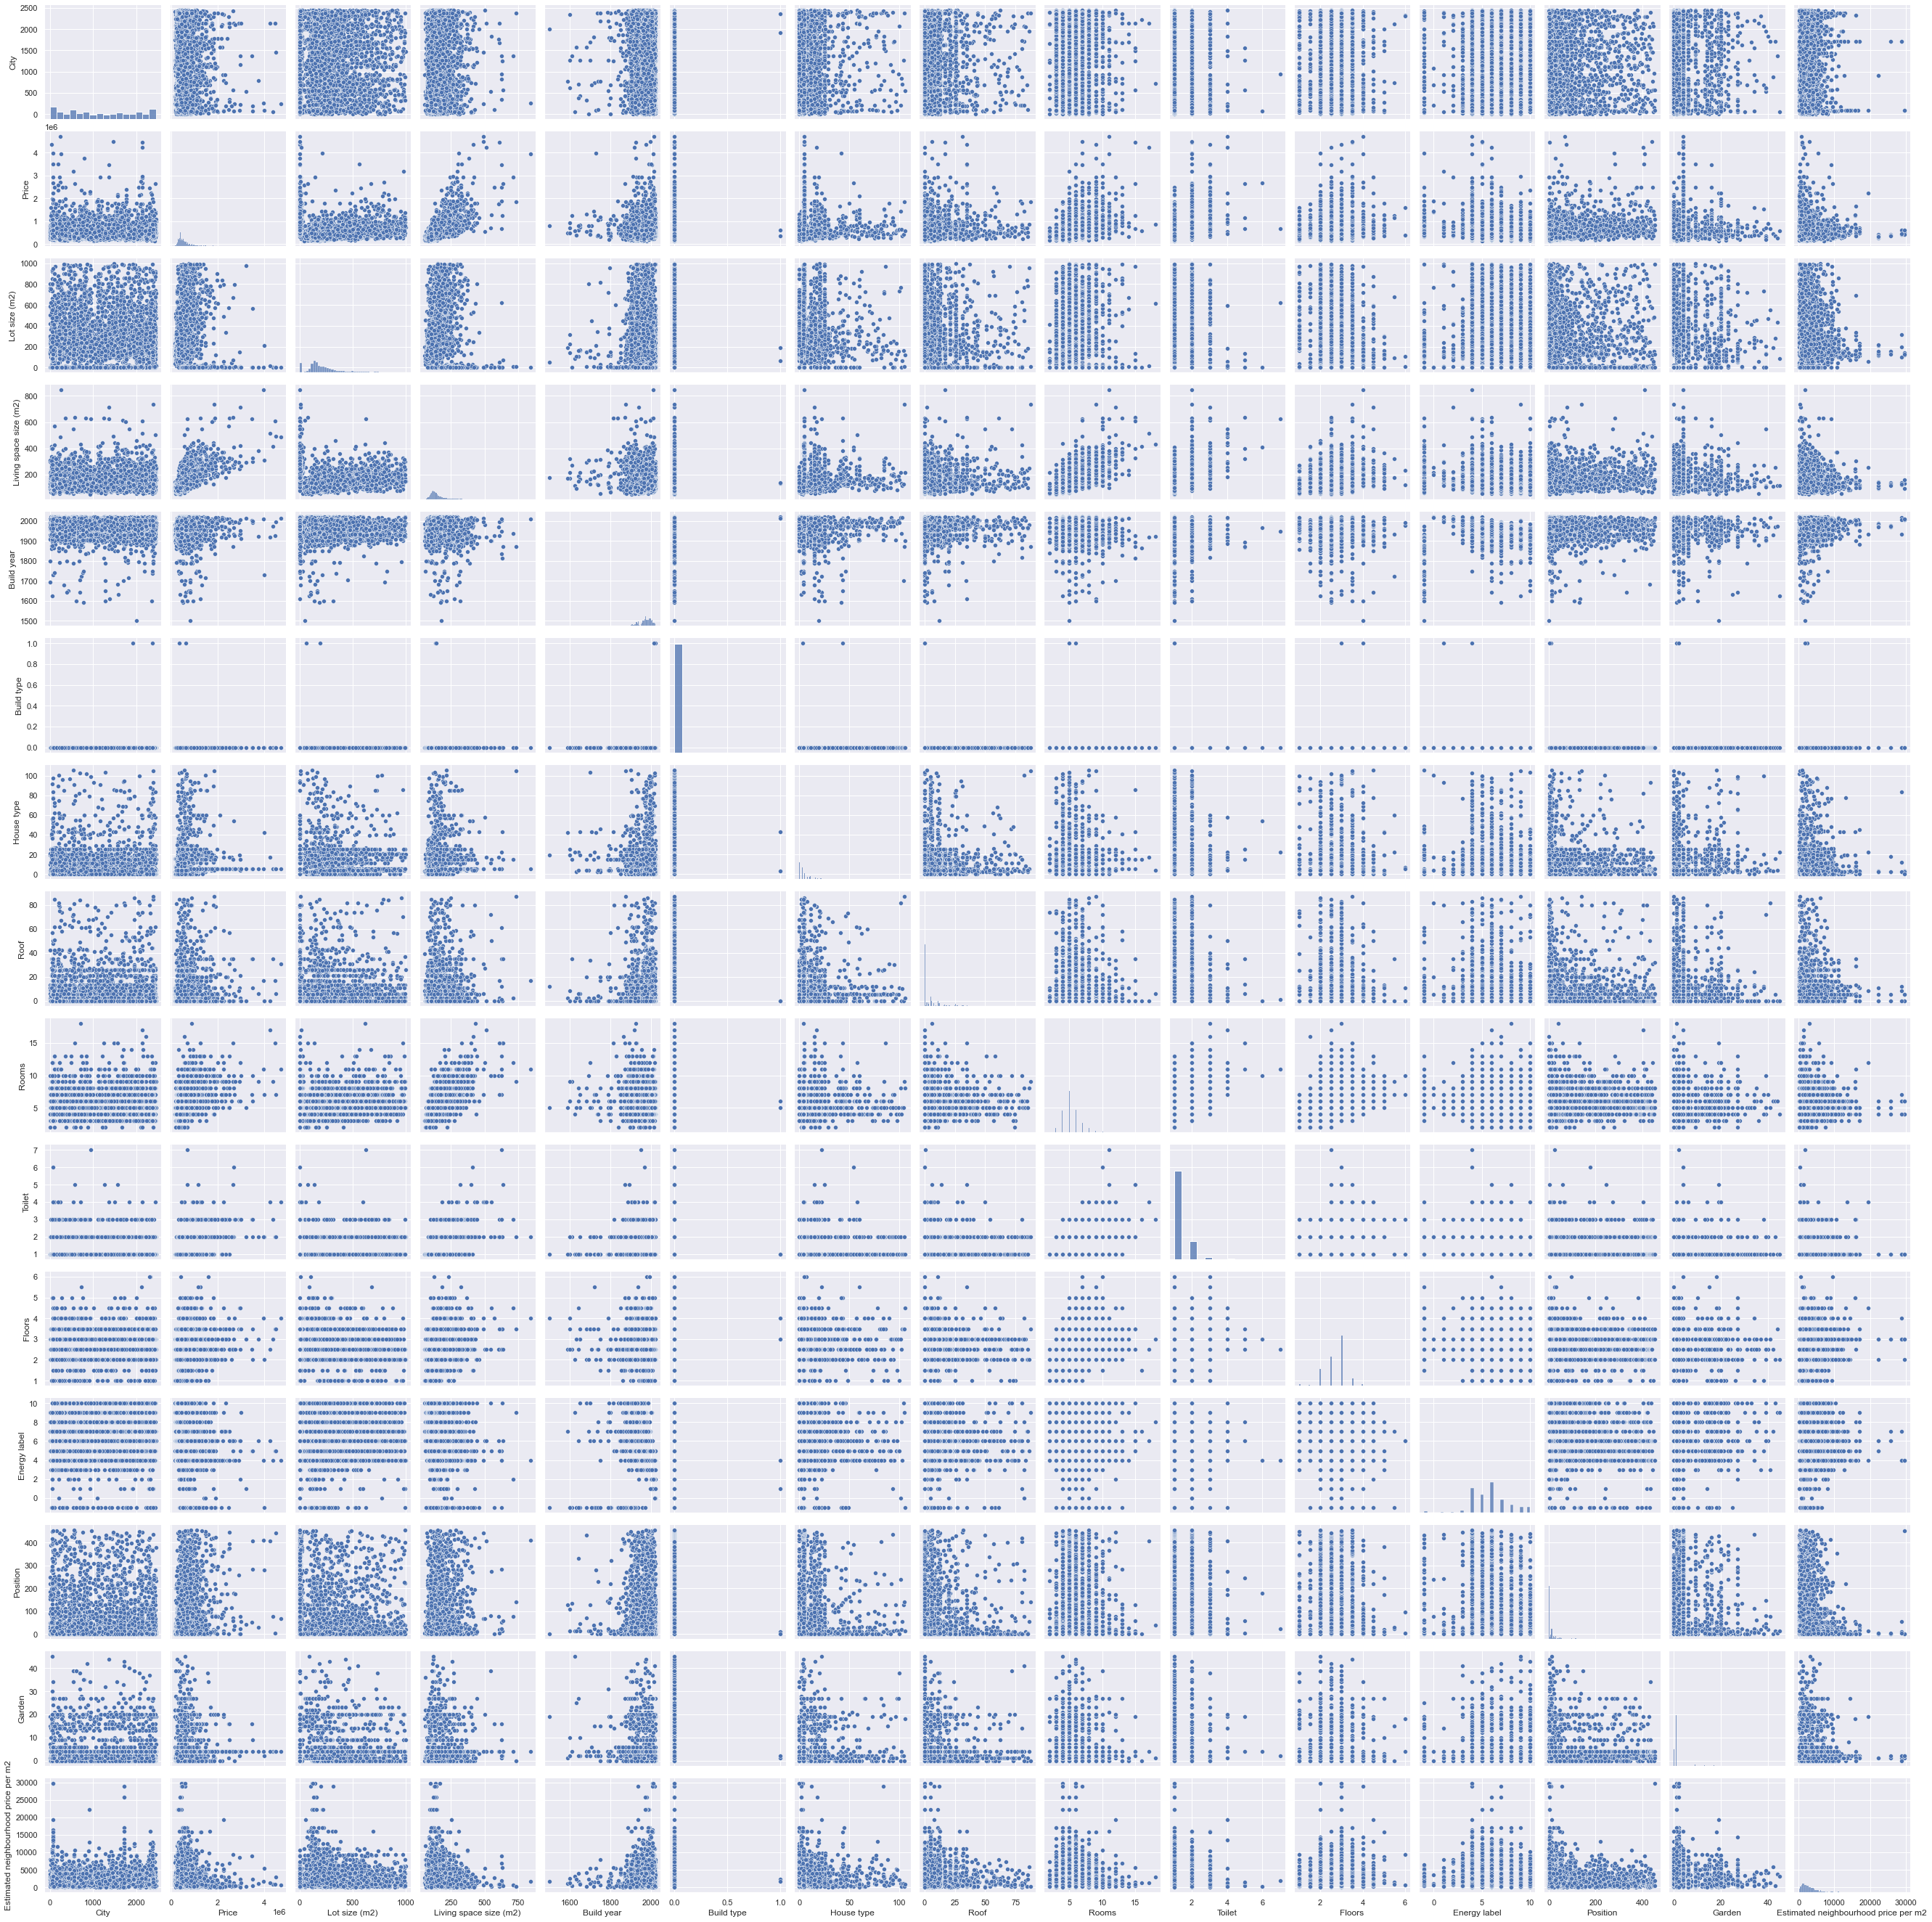

In [ ]:
sns.set(font_scale = 1)
sns.pairplot(df);

We do the same but only plot the row where all characteristics are plotted against the price

In [ ]:
sns.set(font_scale = 10)
sns.pairplot(df, x_vars = ['Lot size (m2)', 'Living space size (m2)',
       'Build year', 'Build type', 'House type', 'Roof', 'Rooms', 'Toilet',
       'Floors', 'Energy label', 'Position', 'Garden',
       'Estimated neighbourhood price per m2'],
             y_vars = ['Price'], height = 40, aspect = 0.6, kind = 'scatter');

Finally, we calculate the correlation between all columns and plot this in a heatmap. Also the numerical values for only the price column are shown.

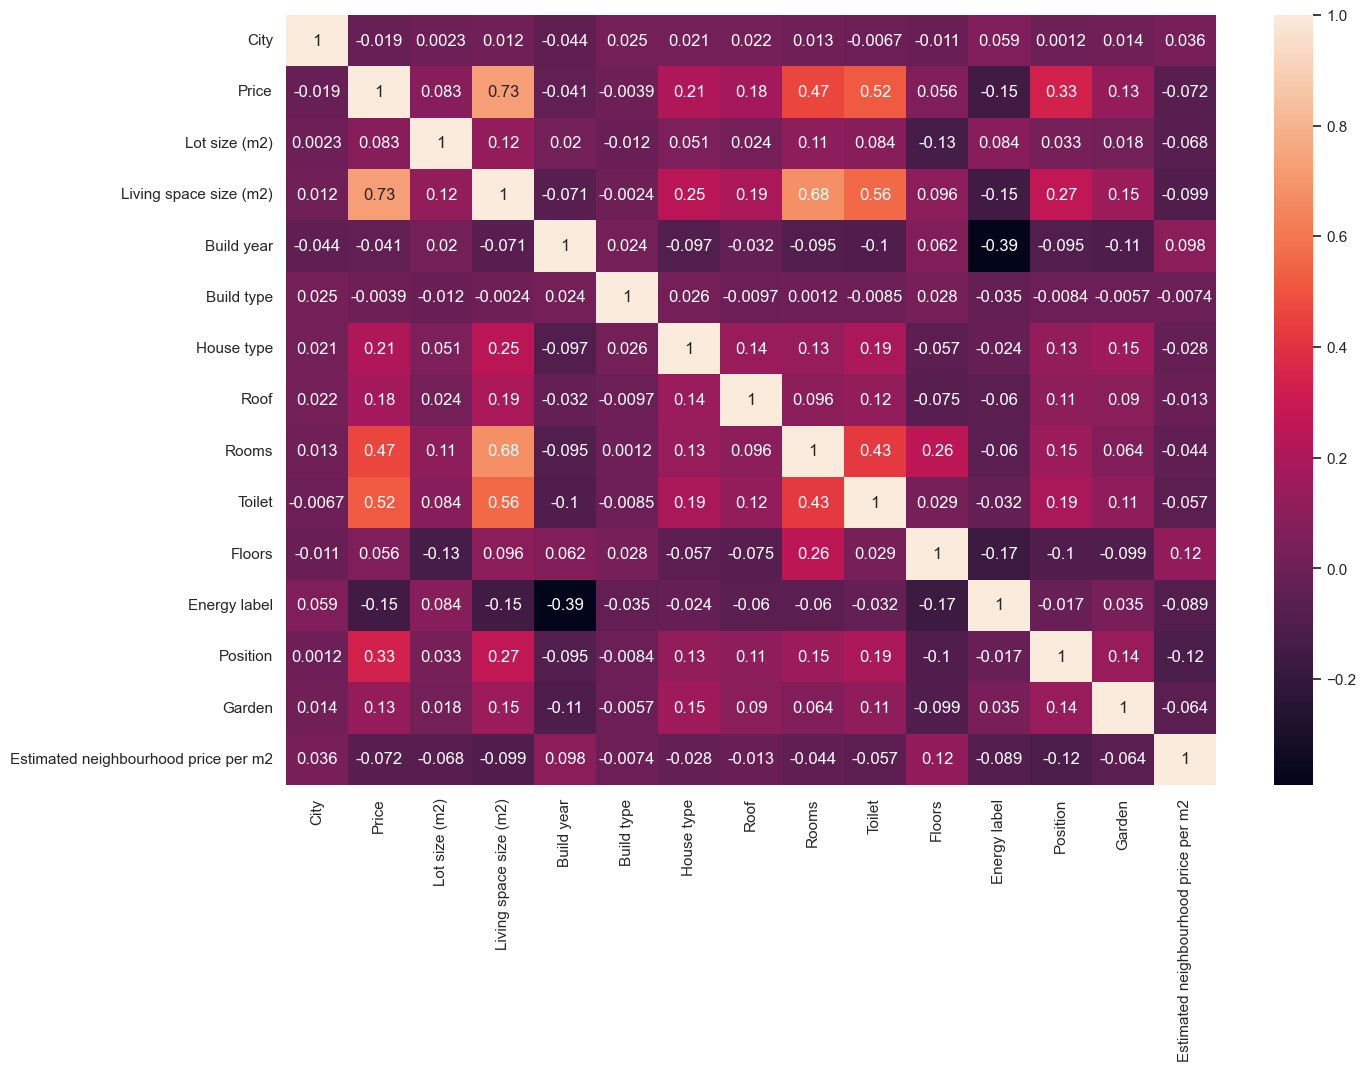

In [ ]:
sns.set(font_scale = 1)
fig, ax = plt.subplots(figsize=(15,10))  
sns.heatmap(df.corr(), annot = True, ax=ax);

In [ ]:
df.corr().Price.sort_values(ascending = False)

Price                                   1.000000
Living space size (m2)                  0.726693
Toilet                                  0.521218
Rooms                                   0.465031
Position                                0.332233
House type                              0.208915
Roof                                    0.176796
Garden                                  0.128376
Lot size (m2)                           0.083465
Floors                                  0.055937
Build type                             -0.003876
City                                   -0.018686
Build year                             -0.041351
Estimated neighbourhood price per m2   -0.072478
Energy label                           -0.146671
Name: Price, dtype: float64

Here we can see that the living space is most correlated with the house price, and could make for a good predictor. Additionally, the number of bathrooms and rooms in general also have a large correlation.

## Final processing
As a final step, we normalize the data

In [ ]:
for column in ['City', 'Lot size (m2)', 'Living space size (m2)', 'Build year',
              'House type', 'Roof', 'Rooms', 'Toilet', 'Floors',
              'Energy label', 'Position', 'Garden',
              'Estimated neighbourhood price per m2']:
    df[column] = (df[column] - df[column].min())/(df[column].max() - df[column].min())

In [ ]:
df['Price'] = df['Price']/100000

The data now looks like this:

In [ ]:
df.head()

City   Price  Lot size (m2)  Living space size (m2)  Build year  \
0  0.738154   5.250       0.250752                0.103666    0.904215   
1  0.862745   4.250       0.180542                0.070796    0.833333   
2  0.377042   5.750       0.197593                0.107459    0.931034   
3  0.651552   2.595       0.230692                0.049305    0.936782   
4  0.707108  10.500       0.423270                0.198483    0.957854   

   Build type  House type      Roof   Rooms    Toilet  Floors  Energy label  \
0         0.0    0.000000  0.000000  0.1875  0.000000     0.4      0.727273   
1         0.0    0.009434  0.011494  0.1250  0.000000     0.4      0.818182   
2         0.0    0.000000  0.000000  0.1875  0.000000     0.4      0.545455   
3         0.0    0.000000  0.000000  0.1875  0.000000     0.4      0.545455   
4         0.0    0.000000  0.022989  0.2500  0.166667     0.7      0.454545   

   Position    Garden  Estimated neighbourhood price per m2  
0  0.000000  0.000000                              0.202285  
1  0.002198  0.022222                              0.047715  
2  0.002198  0.044444                              0.061828  
3  0.002198  0.000000                              0.073085  
4  0.004396  0.000000                              0.044523

We save this dataset in order to use it for model training

In [ ]:
df.to_csv('datasets/processed_data.csv', index=False)